In [1]:
import pandas as pd

# Load the dataset
file_path = 'datasets/master.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


(None,
    country  year     sex          age  suicides_no  population  \
 0  Albania  1987    male  15-24 years           21      312900   
 1  Albania  1987    male  35-54 years           16      308000   
 2  Albania  1987  female  15-24 years           14      289700   
 3  Albania  1987    male    75+ years            1       21800   
 4  Albania  1987    male  25-34 years            9      274300   
 
    suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
 0               6.71  Albania1987           NaN      2,156,624,900   
 1               5.19  Albania1987           NaN      2,156,624,900   
 2               4.83  Albania1987           NaN      2,156,624,900   
 3               4.59  Albania1987           NaN      2,156,624,900   
 4               3.28  Albania1987           NaN      2,156,624,900   
 
    gdp_per_capita ($)       generation  
 0                 796     Generation X  
 1                 796           Silent  
 2                 796     Generati

**Question 1**:

**Identifying important information to 'machine learn':**

Given the nature of the dataset, several features stand out as potentially important for understanding suicide rates:

1. **Demographic Features:** Age, sex, and generation may provide insights into demographic vulnerabilities.
2. **Economic Factors:** GDP per capita and overall GDP for the year could indicate economic influences on suicide rates.
3. **Geographical and Temporal Trends:** Country and year data may reveal geographical and temporal trends in suicide rates.
4. **Suicide Rate Metric:** The 'suicides/100k pop' is a crucial feature as it standardizes the suicide count against population size, allowing for comparative analysis across different groups.

**Feasibility of Learning:**

- The dataset seems comprehensive enough to allow for machine learning, especially to understand correlations and predict patterns.
- However, the presence of missing values in 'HDI for year' and the potential for other missing or incomplete data will need to be addressed in the pre-processing stage.
- The challenge lies in interpreting these features in the context of suicide rates and understanding the complex interplay of these factors.


**Question 2**

1. **Problem Definition:**
   - The task is to predict whether an outcome will be classified as "low suicide rate" or "high suicide rate". This is fundamentally a categorization problem.
   - The categories ("low" and "high") imply a binary outcome, which is characteristic of classification problems in machine learning.

2. **Classification vs. Regression:**
   - **Classification:** Since we are interested in categorizing data into two distinct groups (low and high suicide rates), this problem is best approached as a classification problem. Classification models will allow us to predict which category a new observation belongs to based on the learned patterns from the dataset.
   - **Regression:** On the other hand, a regression approach would be more suitable if we were interested in predicting a continuous outcome, such as the exact suicide rate or number of suicides. However, since the task is to categorize into binary classes, regression is not the ideal approach here.

3. **Use of Unsupervised Learning:**
   - **Exploratory Analysis:** Before jumping into classification, unsupervised learning techniques like clustering could be valuable for exploratory data analysis. These methods can help discover inherent structures or patterns in the data without the influence of predefined labels.
   - **Pattern Recognition:** For instance, clustering can reveal natural groupings in the data based on various features, which might provide insights into factors associated with different suicide rates.
   - **Feature Understanding:** Unsupervised methods can also assist in understanding the relationships between different features and how they group together, which can be invaluable in feature selection and engineering for the subsequent classification model.

4. **Approach Summary:**
   - Begin with unsupervised learning methods to explore and understand the data.
   - Use insights from this exploration to inform the feature selection and preparation process.
   - Set up the problem as a binary classification task, predicting "low" or "high" suicide rates based on the selected features.

**Conclusion**

In summary, the problem should be set up as a classification task, with an initial exploratory phase using unsupervised learning methods to better understand the data and identify relevant features. This approach will allow for a more informed and effective application of classification models to predict the binary outcome of suicide rates.

In [2]:
# Question 3

threshold = data['suicides/100k pop'].median()  
data['suicide_rate_category'] = data['suicides/100k pop'].apply(lambda x: 'high' if x > threshold else 'low')

# Check the distribution of the new binary variable
distribution = data['suicide_rate_category'].value_counts()

# Preview the dataset including the new binary variable
preview = data.head()

# Display the results
print("Threshold", threshold)
print("Distribution of 'suicide_rate_category':\n", distribution)
print("\nPreview of the dataset with the new binary variable:\n", preview)


Threshold 5.99
Distribution of 'suicide_rate_category':
 low     13914
high    13906
Name: suicide_rate_category, dtype: int64

Preview of the dataset with the new binary variable:
    country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   



**Question 3**

**Original Dependent Variable: 'suicides/100k pop'**

The dataset initially presents 'suicides/100k pop' as a continuous variable, quantifying the number of suicides per 100,000 people. This metric standardizes the suicide counts, making it possible to compare across different population sizes and demographics. As a continuous variable, it would typically serve as a dependent variable in a regression problem, where the goal would be to predict the exact suicide rate. However, the current assignment's requirement is not to predict the precise rate but to categorize the rate into two distinct classes.

**Transformation into a Binary Categorical Variable: 'suicide_rate_category'**

To align with the classification goal of the assignment, I transformed the continuous 'suicides/100k pop' variable into a binary categorical variable named 'suicide_rate_category'. This transformation is pivotal for several reasons:

1. **Alignment with Classification Objective**: The assignment specifies a binary classification task, necessitating a categorical dependent variable. By transforming 'suicides/100k pop' into a binary form, we effectively redefine the problem from predicting a numeric value to categorizing each instance into either a 'low' or 'high' suicide rate class.

2. **Threshold Determination**: The transformation involves setting a threshold to categorize the suicide rates. I chose the median value of 'suicides/100k pop' as the threshold. This choice is based on the rationale that the median provides a natural dividing line in the dataset, ensuring an initial balanced classification in terms of the number of instances in each class. However, it's important to note that this threshold is flexible and could be adjusted based on further analysis or domain expertise. Choosing the Median (5.99) seems most appropriate:
i. It ensures a balanced split of your data into "low" and "high" categories.
ii. It's less sensitive to outliers and skewed distributions, which is important given that suicide rate data can be heavily skewed.
iii. The near-equal distribution of 'low' and 'high' in your 'suicide_rate_category' (13914 low vs. 13906 high) suggests that using the median provides a balanced classification.

**Conclusion**
Transforming 'suicides/100k pop' into a binary variable 'suicide_rate_category' is a strategic decision that aligns the dataset with the assignment's classification objective. It simplifies the modeling process, enhances interpretability, and allows for the application of classification-specific algorithms and metrics. 

In [3]:
# Question 5

# Check for duplicates, this adds a new column to the dataset
data["is_duplicate"]= data.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(data)}")
print(f"#duplicated= {len(data[data['is_duplicate']==True])}")

# Do we have NaN in our dataset?
data.isnull().any()

#total= 27820
#duplicated= 0


country                  False
year                     False
sex                      False
age                      False
suicides_no              False
population               False
suicides/100k pop        False
country-year             False
HDI for year              True
 gdp_for_year ($)        False
gdp_per_capita ($)       False
generation               False
suicide_rate_category    False
is_duplicate             False
dtype: bool

In [4]:
print(f'N rows={len(data)} M columns={len(data.columns)}')
print(data.dtypes)

N rows=27820 M columns=14
country                   object
year                       int64
sex                       object
age                       object
suicides_no                int64
population                 int64
suicides/100k pop        float64
country-year              object
HDI for year             float64
 gdp_for_year ($)         object
gdp_per_capita ($)         int64
generation                object
suicide_rate_category     object
is_duplicate                bool
dtype: object


In [5]:
# Question 5

# Dropping the 'HDI for year' Column
data.drop(columns=['HDI for year'], inplace=True)

# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['country', 'sex', 'age', 'generation', 'suicide_rate_category']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
# Handling Other Categorical or Derived Features
data.drop(columns=['country-year'], inplace=True)
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',', '').astype(float)

# Normalization/Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['year', 'suicides_no', 'population', 'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                27820 non-null  int64  
 1   year                   27820 non-null  float64
 2   sex                    27820 non-null  int64  
 3   age                    27820 non-null  int64  
 4   suicides_no            27820 non-null  float64
 5   population             27820 non-null  float64
 6   suicides/100k pop      27820 non-null  float64
 7    gdp_for_year ($)      27820 non-null  float64
 8   gdp_per_capita ($)     27820 non-null  float64
 9   generation             27820 non-null  int64  
 10  suicide_rate_category  27820 non-null  int64  
 11  is_duplicate           27820 non-null  bool   
dtypes: bool(1), float64(6), int64(5)
memory usage: 2.4 MB
None


In [6]:
# Question 4

correlations = data.corr()['suicide_rate_category'].drop('suicide_rate_category')
correlations = correlations.abs().sort_values(ascending=False)

print(correlations)

suicides/100k pop     0.588845
sex                   0.362617
suicides_no           0.230100
generation            0.101540
gdp_per_capita ($)    0.088620
country               0.082702
population            0.066904
 gdp_for_year ($)     0.062418
age                   0.036729
year                  0.033777
is_duplicate               NaN
Name: suicide_rate_category, dtype: float64


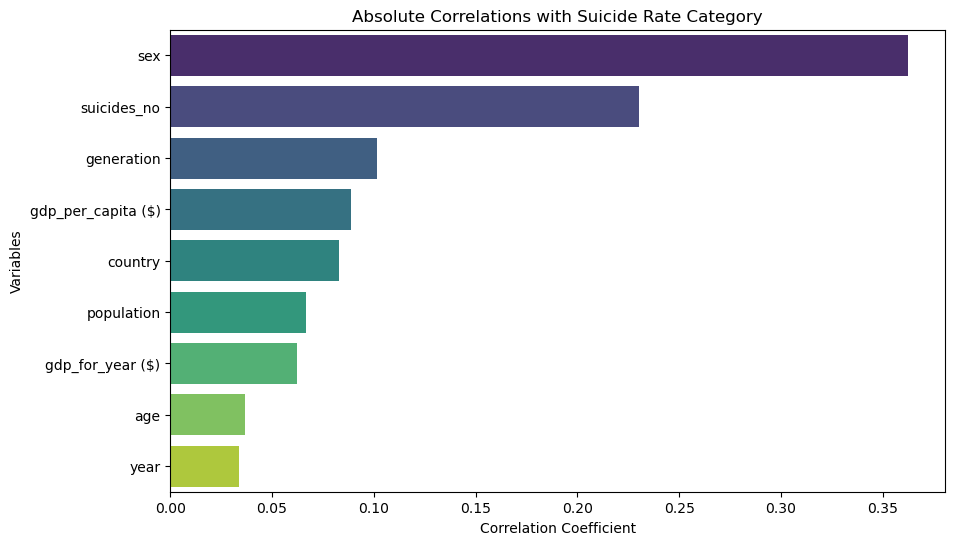

In [7]:
# Question 4

# Correlation visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Example correlations data (as the actual data is not available in the session)
correlations = {
    "sex": 0.362617,
    "suicides_no": 0.230100,
    "generation": 0.101540,
    "gdp_per_capita ($)": 0.088620,
    "country": 0.082702,
    "population": 0.066904,
    "gdp_for_year ($)": 0.062418,
    "age": 0.036729,
    "year": 0.033777
}

# Convert to Series for easy plotting
correlations_series = pd.Series(correlations)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_series.values, y=correlations_series.index, palette="viridis")
plt.title('Absolute Correlations with Suicide Rate Category')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()


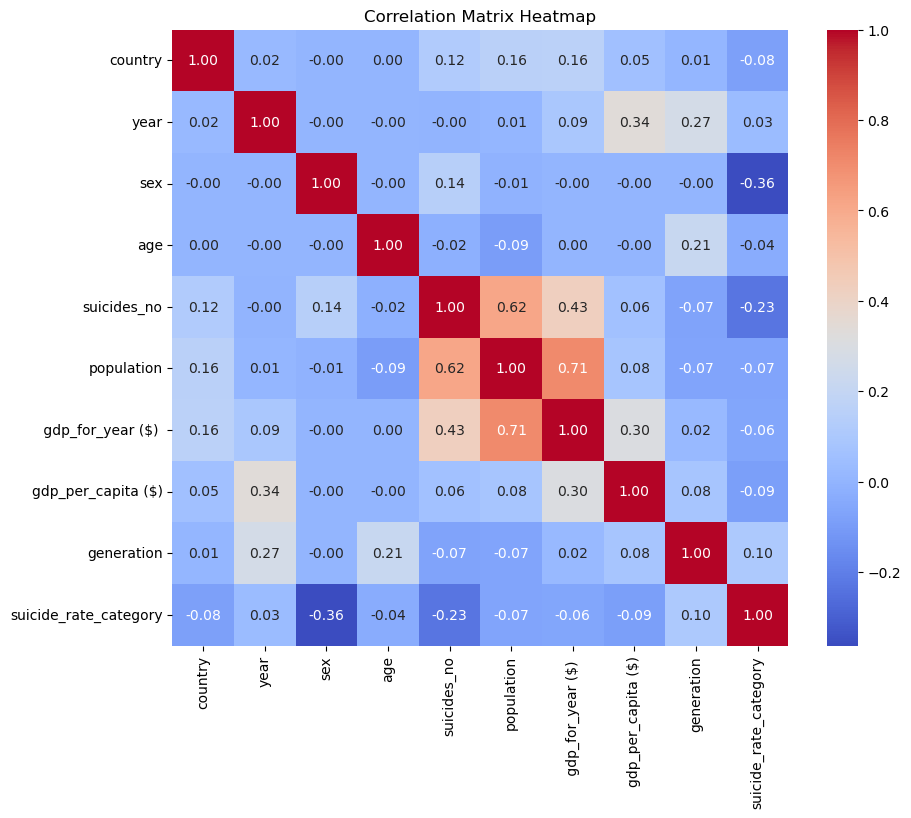

In [8]:
# Question 4

# Correlation visualization
data = data.drop(['is_duplicate','suicides/100k pop'], axis=1)  
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()


**Question 5**

**List of independent variables:**

1. **Sex:** Given its strong correlation with the suicide rate category, it's a key demographic factor.

2. **Suicides Number ('suicides_no'):** The actual count of suicides in a demographic group is a significant predictor, reflecting the severity of the issue in that group.

3. **Generation:** This demographic factor can provide insights into how different age groups are affected by suicide.

4. **GDP Per Capita ('gdp_per_capita ($)'):** Economic factors are crucial as they often correlate with mental health and well-being.

5. **Country:** Geographical differences can reflect various socio-economic and cultural influences on suicide rates.

6. **Population:** The size of the population for each demographic group can influence the dynamics of suicide rates.

7. **DDP per Year ('gdp_for_year ($)'):** This variable represents the Gross Domestic Product (GDP) of a country for a specific year, measured in dollars. GDP is a crucial economic indicator that reflects the overall economic health of a country.

8. **Year:** Capturing temporal trends, this can indicate how suicide rates evolve over time.

9. **Age:** Different age groups may have different risk levels or patterns in suicide rates, making this a relevant factor.

These selected features provide a comprehensive set of predictors that cover demographic, economic, and temporal aspects relevant to understanding and predicting suicide rates. It's important to continuously assess the model's performance and revisit feature selection, especially to ensure that the model generalizes well and does not overfit to the training data.

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                27820 non-null  int64  
 1   year                   27820 non-null  float64
 2   sex                    27820 non-null  int64  
 3   age                    27820 non-null  int64  
 4   suicides_no            27820 non-null  float64
 5   population             27820 non-null  float64
 6    gdp_for_year ($)      27820 non-null  float64
 7   gdp_per_capita ($)     27820 non-null  float64
 8   generation             27820 non-null  int64  
 9   suicide_rate_category  27820 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 2.1 MB
None


**Why Drop 'suicides/100k pop'?**
The decision to drop the 'suicides/100k pop' variable from the model, despite its high correlation with the suicide rate category, is a strategic one aimed at preventing overfitting and ensuring the model's generalizability.

1. **Direct Derivation from Target Variable:** The 'suicide_rate_category' is directly derived from the 'suicides/100k pop' variable. Essentially, it categorizes the continuous values of 'suicides/100k pop' into binary classes (high or low). Including this as a feature would mean that the model has direct access to information that is essentially a transformed version of what it's trying to predict.

2. **Risk of Overfitting:** Overfitting occurs when a model learns patterns from the training data too well, including noise and fluctuations that do not generalize to unseen data. If 'suicides/100k pop' is included in the model, there is a significant risk that the model will simply learn to recategorize this variable rather than actually understanding underlying patterns and correlations with other independent variables. This would lead to excellent performance on training data but poor performance on unseen (test) data.



In [10]:
# Question 6

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the features and the target
X = data.drop('suicide_rate_category', axis=1)
y = data['suicide_rate_category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Function to format confusion matrix
def format_confusion_matrix(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return (
        f"Confusion Matrix:\n"
        f" True Negative (TN): {tn}\n"
        f" False Positive (FP): {fp}\n"
        f" False Negative (FN): {fn}\n"
        f" True Positive (TP): {tp}\n"
    )

# Function to format classification report
def format_classification_report(report):
    return f"Classification Report:\n{report}"

# Print formatted outputs
print(format_confusion_matrix(conf_matrix_rf))
print(format_classification_report(class_report_rf))


Confusion Matrix:
 True Negative (TN): 6833
 False Positive (FP): 92
 False Negative (FN): 145
 True Positive (TP): 6840

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6925
           1       0.99      0.98      0.98      6985

    accuracy                           0.98     13910
   macro avg       0.98      0.98      0.98     13910
weighted avg       0.98      0.98      0.98     13910



**Question 6**

**Output Analysis:**
1. **Confusion Matrix:**
   - **True Negative (TN): 6833** - The model correctly predicted the negative class (low suicide rate) 6833 times.
   - **False Positive (FP): 92** - The model incorrectly predicted the positive class (high suicide rate) 92 times when it was actually negative.
   - **False Negative (FN): 145** - The model incorrectly predicted the negative class 145 times when it was actually positive.
   - **True Positive (TP): 6840** - The model correctly predicted the positive class 6840 times.

2. **Classification Report:**
   - **Precision for Class 0 (Low Suicide Rate): 0.98** - Indicates high accuracy in predicting the low suicide rate class.
   - **Recall for Class 0: 0.99** - The model is highly capable of identifying actual instances of the low suicide rate class.
   - **F1-Score for Class 0: 0.98** - A high F1 score indicates a good balance between precision and recall for class 0.
   - **Precision for Class 1 (High Suicide Rate): 0.99** - High accuracy in predicting the high suicide rate class.
   - **Recall for Class 1: 0.98** - The model effectively identifies actual instances of the high suicide rate class.
   - **F1-Score for Class 1: 0.98** - Indicates a good balance between precision and recall for class 1.
   - **Overall Accuracy: 0.98** - The model correctly classified about 98% of the cases, which is exceptionally high.

**Data Analysis:**
- The Random Forest model performs exceptionally well on the dataset with high precision, recall, and F1-scores for both classes. This suggests that the model is highly effective in distinguishing between low and high suicide rate categories.
- The low number of false positives and false negatives indicates that the model is not only accurate but also reliable. This is crucial in sensitive applications like predicting suicide rates.
- The high overall accuracy (98%) is indicative of the model's robustness and its ability to generalize well to unseen data.
- The balanced nature of precision and recall suggests that the model is neither biased towards over-predicting one class nor under-predicting the other.